<a href="https://colab.research.google.com/github/iamhero2709/Learning-Projects-Notebook/blob/main/tensorflow_withdl/tensorlow_conv3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Tensorflow comvulation

In [2]:
import numpy as np
import tensorflow as tf

In [3]:
input=tf.Variable(tf.random.normal([1,10,10,1]))
filter=tf.Variable(tf.random.normal([3,3,1,1]))
op=tf.nn.conv2d(input,filter,strides=[1,1,1,1],padding='VALID')
op2=tf.nn.conv2d(input,filter,strides=[1,1,1,1],padding='SAME')
print("Input \n")
print('{0} \n'.format(input.numpy()))
print("Filter/Kernel \n")
print('{0} \n'.format(filter.numpy()))
print("Result/Feature Map with valid positions \n")
print(op.numpy())
print('\n')
print("Result/Feature Map with padding \n")
print(op2.numpy())

Input 

[[[[ 1.610122  ]
   [-0.32965913]
   [-0.6145598 ]
   [ 0.12859958]
   [-0.28151107]
   [ 0.69847536]
   [ 1.9855703 ]
   [ 0.48651507]
   [ 1.436414  ]
   [ 0.77255833]]

  [[ 1.1790075 ]
   [-2.7513318 ]
   [-1.1431398 ]
   [ 0.3584099 ]
   [ 0.54508656]
   [-1.453195  ]
   [-2.665254  ]
   [-0.82687414]
   [ 0.71098334]
   [ 0.56966335]]

  [[-0.24845167]
   [ 1.2076459 ]
   [ 0.3070472 ]
   [ 0.5091174 ]
   [-0.05134739]
   [ 0.2484107 ]
   [ 1.2339246 ]
   [-0.27493358]
   [-0.8760281 ]
   [ 0.7662991 ]]

  [[-0.40623605]
   [-1.859913  ]
   [ 0.24862361]
   [-0.32332075]
   [-1.4421179 ]
   [-0.82293725]
   [ 0.46765178]
   [ 0.9416508 ]
   [ 0.03151676]
   [-0.68364996]]

  [[ 0.02893   ]
   [ 0.14015795]
   [ 0.34280583]
   [ 0.5092694 ]
   [ 0.6235673 ]
   [ 0.62713933]
   [-0.43287686]
   [ 0.2961427 ]
   [-0.61007607]
   [-0.45883211]]

  [[ 0.70440626]
   [-1.839007  ]
   [-2.579588  ]
   [ 0.62169224]
   [ 3.2579215 ]
   [ 0.49015218]
   [-0.945709  ]
   [ 0.085106

Convultion applied on Images
---

In [5]:
# downliaidng standard image

In [4]:
!wget --quiet https://ibm.box.com/shared/static/cn7yt7z10j8rx6um1v9seagpgmzzxnlz.jpg --output-document bird.jpg

In [7]:
from scipy import signal
from scipy import misc
import matplotlib.pyplot as plt
from PIL import Image

In [8]:
im=Image.open('bird.jpg') # type here your image name
image_gr=im.convert('L') # CONVERT ('L) color images into BLACK and white
# uses the ITU-R 601-2 luma transform ( there are several )
# ways to convert an image to gry scale
print("\n Original type: %r \n\n" % image_gr)


 Original type: <PIL.Image.Image image mode=L size=1920x1440 at 0x7F44FCE30350> 




After conversion to a numerical repersenattion : 

 array([[ 64,  71,  65, ...,  49,  47,  48],
       [ 68,  71,  64, ...,  54,  52,  51],
       [ 65,  69,  66, ...,  54,  50,  55],
       ...,
       [ 22,  23,  23, ..., 184, 170, 155],
       [ 18,  21,  26, ..., 179, 166, 153],
       [ 27,  22,  21, ..., 170, 159, 149]], dtype=uint8)

 Input image converted to gray scale: 



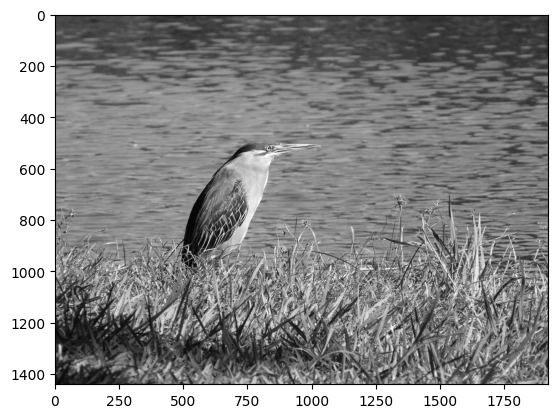

In [10]:
# converting images to a matrix with values from 0 to 255 (uint8)
arr=np.asarray(image_gr)
print("After conversion to a numerical repersenattion : \n\n %r"% arr)
%matplotlib inline
### plot image
imgplot=plt.imshow(arr) # activating matplotlib for ipython
imgplot.set_cmap('gray')
print("\n Input image converted to gray scale: \n") # we can experimnet diffrent colormaps
plt.show(imgplot)

In [11]:
# now we will experimnet using an edgfe detector kernel


In [12]:
kernel = np.array([[ 0, 1, 0],
                   [ 1,-4, 1],
                   [ 0, 1, 0],])
grad = signal.convolve2d(arr, kernel, mode='same', boundary='symm')

GRADIENT MAGNITUDE - Feature map


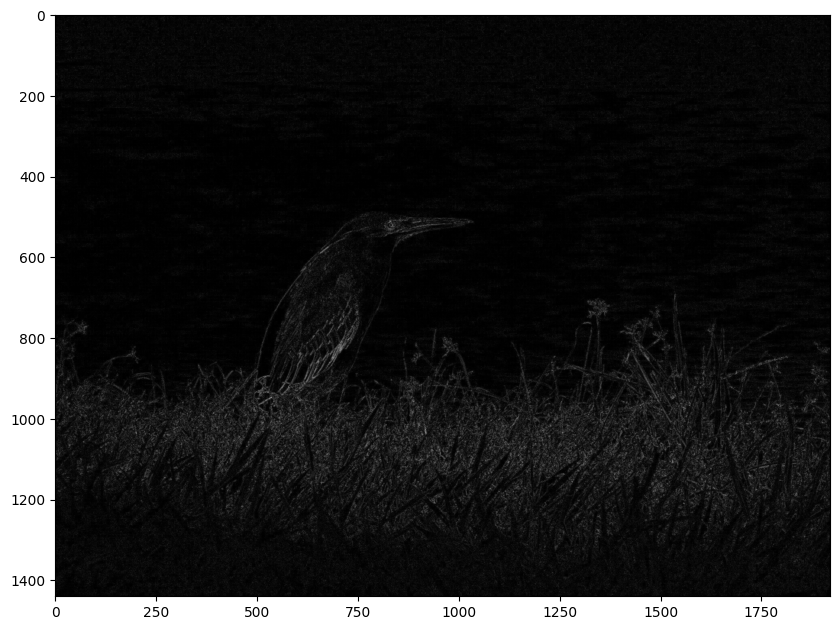

In [13]:
%matplotlib inline

print('GRADIENT MAGNITUDE - Feature map')

fig, aux = plt.subplots(figsize=(10, 10))
aux.imshow(np.absolute(grad), cmap='gray')


In [14]:
# we usually convert the pixel;s value frm range 0 to 1 this process is called normalization|

In [16]:
type(grad)
grad_biases = np.absolute(grad) + 100

grad_biases[grad_biases > 255] = 255

GRADIENT MAGNITUDE - Feature map


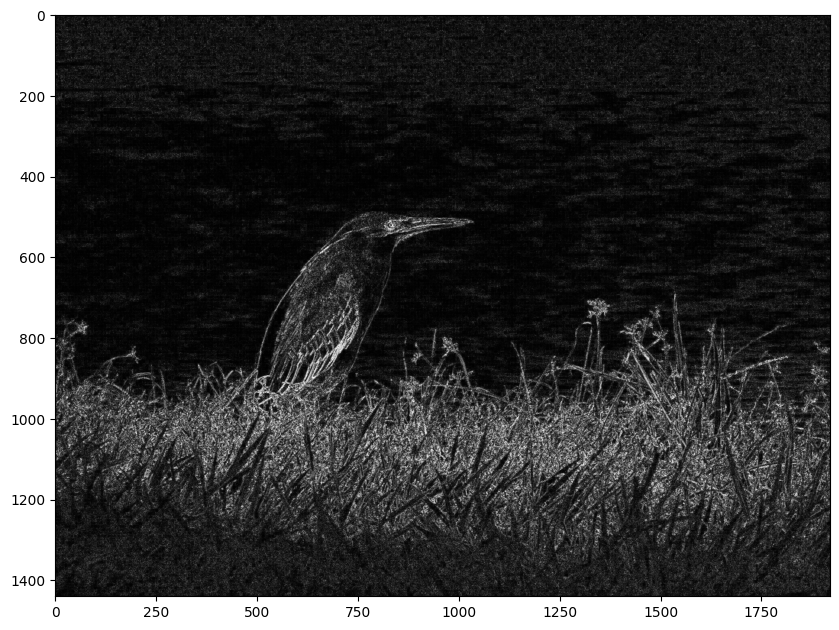

In [17]:
%matplotlib inline
print('GRADIENT MAGNITUDE - Feature map')
fig,aux=plt.subplots(figsize=(10, 10))
aux.imshow(np.absolute(grad_biases), cmap='gray')

In [18]:
#Lets see how it works for a digit:


In [19]:
# download standard image
!wget --quiet https://ibm.box.com/shared/static/vvm1b63uvuxq88vbw9znpwu5ol380mco.jpg --output-document num3.jpg

In [20]:
im=Image.open('num3.jpg')
image_gr=im.convert('L')
print("\n Original type: %r \n\n" % image_gr)


 Original type: <PIL.Image.Image image mode=L size=181x181 at 0x7F44EF100110> 




In [21]:
# convert image to a matrix with values from 0 to 255 (uint8)
arr = np.asarray(image_gr)
print("After conversion to numerical representation: \n\n %r" % arr)
### Activating matplotlib for Ipython
%matplotlib inline

After conversion to numerical representation: 

 array([[26, 14, 12, ..., 11, 11, 11],
       [ 0,  0,  1, ...,  0,  0,  0],
       [12,  1,  0, ...,  0,  0,  0],
       ...,
       [12,  0,  0, ...,  0,  0,  0],
       [12,  0,  0, ...,  0,  0,  0],
       [12,  0,  0, ...,  0,  0,  0]], dtype=uint8)



 Input image converted to gray scale: 



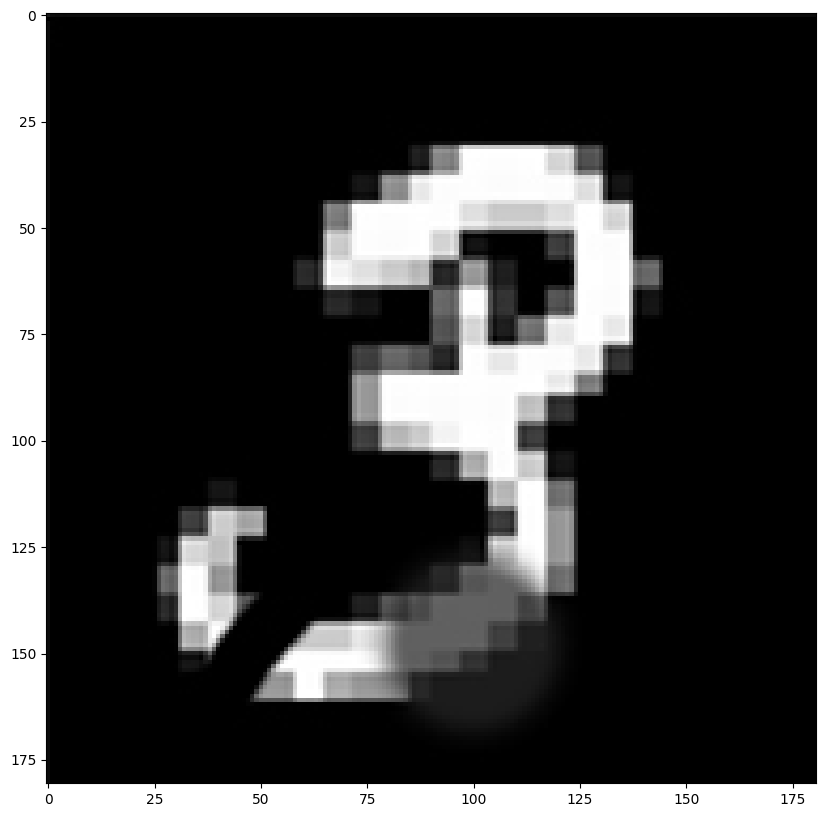

In [22]:
### Plot image
fig, aux = plt.subplots(figsize=(10, 10))
imgplot = plt.imshow(arr)
imgplot.set_cmap('gray')  #you can experiment different colormaps (Greys,winter,autumn)
print("\n Input image converted to gray scale: \n")
plt.show(imgplot)

GRADIENT MAGNITUDE - Feature map


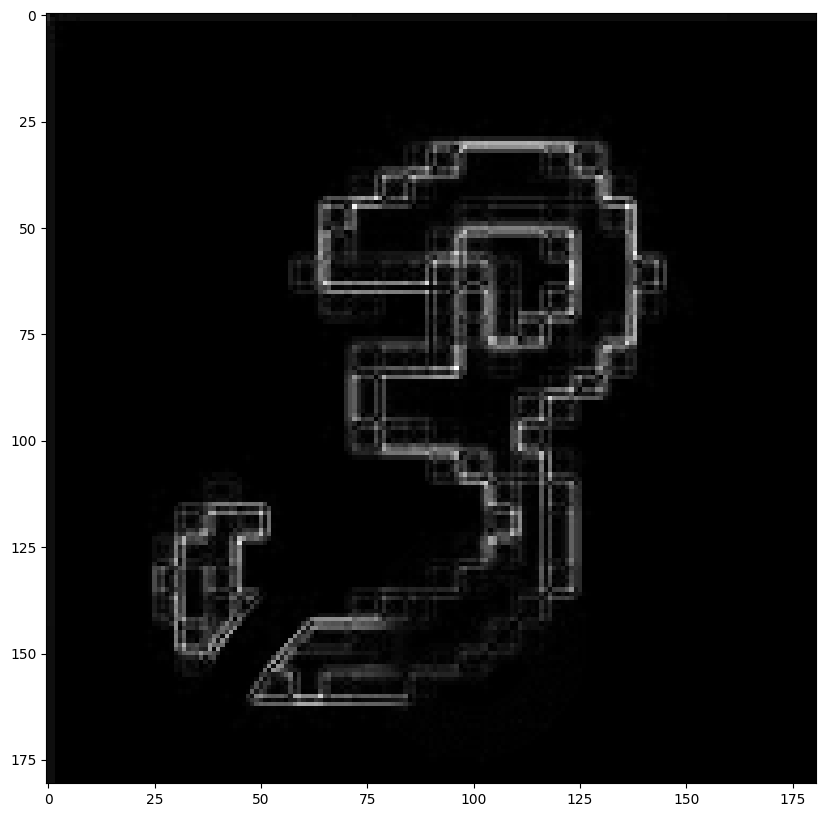

In [23]:
# experimenting with edge kernel detector
kernel = np.array([
                        [ 0, 1, 0],
                        [ 1,-4, 1],
                        [ 0, 1, 0],
                                     ])

grad = signal.convolve2d(arr, kernel, mode='same', boundary='symm')
%matplotlib inline

print('GRADIENT MAGNITUDE - Feature map')

fig, aux = plt.subplots(figsize=(10, 10))
aux.imshow(np.absolute(grad), cmap='gray')
